In [94]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
os.chdir(r'C:\Users\shubham\Desktop\case_study_python\9 Unsupervised Learning')

In [95]:
dataset = pd.read_csv('driver-data.csv')

In [96]:
dataset

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [97]:
x=dataset.iloc[:,1:3].values
x

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [98]:
from sklearn.cluster import KMeans

In [99]:
wcss = []
for i in range(1,11):
    KMean = KMeans(n_clusters = i , init='k-means++')
    KMean.fit(x)
    wcss.append(KMean.inertia_)


In [100]:
wcss

[12184626.129627962,
 1316420.8509477214,
 992634.0606702507,
 719601.5383469048,
 534804.5492845458,
 372867.5481158847,
 319773.7478161787,
 277014.4273049073,
 252782.04574131136,
 231264.62398757538]

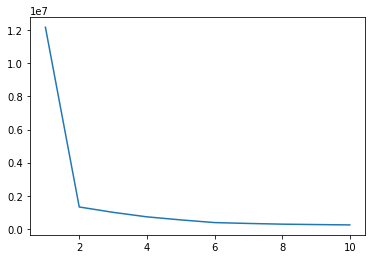

In [101]:
plt.plot(range(1,11),wcss)

In [114]:
KMean = KMeans(n_clusters = 2 , init='k-means++')
y_kmeans = KMean.fit_predict(x)

In [115]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [120]:
dataset=pd.concat([dataset,pd.DataFrame(y_kmeans)],axis=1)

In [125]:
dataset.tail(40)

,id,mean_dist_day,mean_over_speed_perc,0
3960,3423311459,153.58,12,1
3961,3423310920,185.68,18,1
3962,3423311219,214.80,20,1
3963,3423310460,185.39,20,1
3964,3423314058,169.35,19,1
3965,3423313313,181.75,10,1
3966,3423311165,159.89,17,1
3967,3423310652,196.52,12,1
3968,3423311383,169.65,14,1
3969,3423313327,192.21,8,1


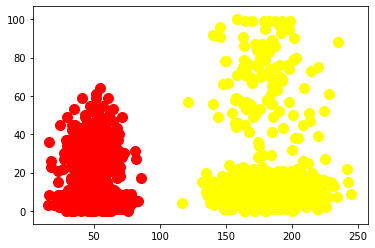

In [117]:
plt.scatter(x[y_kmeans==0 , 0],x[y_kmeans==0 , 1],s=100,c='red')
plt.scatter(x[y_kmeans==1 , 0],x[y_kmeans==1 , 1],s=100,c='yellow')


In [118]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y_kmeans)

0.8490223286225532